<a href="https://colab.research.google.com/github/ramboo1/Sudoku-Solver-GUI/blob/main/UpperConfidenceBound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Ads_Optimisation.csv')

In [ ]:
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [ ]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
  ad = random.randrange(d)
  ads_selected.append(ad)
  reward = data.values[n, ad]
  total_reward = total_reward + reward


In [ ]:
pd.Series(ads_selected).tail(10000).value_counts(normalize=True)

6    0.1053
8    0.1023
3    0.1021
5    0.1003
4    0.1003
2    0.1003
9    0.0995
7    0.0982
0    0.0973
1    0.0944
dtype: float64

In [ ]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

4    0.9935
7    0.0025
0    0.0020
6    0.0004
3    0.0003
1    0.0003
8    0.0003
9    0.0003
5    0.0002
2    0.0002
dtype: float64


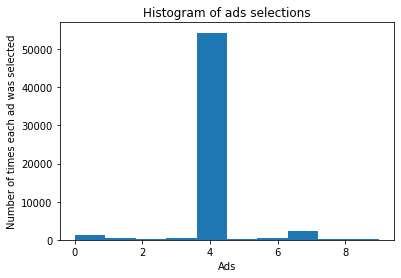

In [ ]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = data.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
    
print(pd.Series(ads_selected).tail(10000).value_counts(normalize=True))
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

4    0.9880
0    0.0049
7    0.0046
3    0.0008
5    0.0008
1    0.0003
6    0.0002
8    0.0002
2    0.0001
9    0.0001
dtype: float64


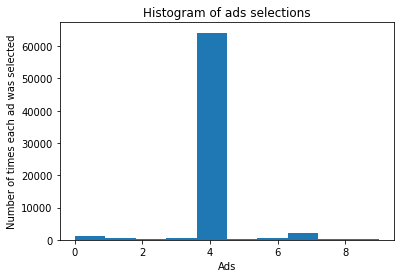

In [ ]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e10000
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = data.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

print(pd.Series(ads_selected).tail(10000).value_counts(normalize=True))
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

4    0.9712
7    0.0129
0    0.0100
1    0.0017
9    0.0017
3    0.0006
6    0.0006
8    0.0005
5    0.0004
2    0.0004
dtype: float64


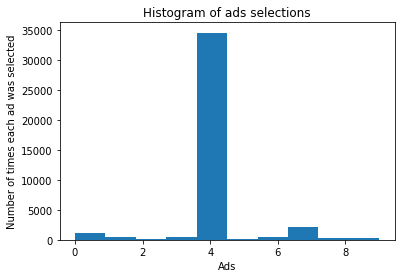